<a href="https://colab.research.google.com/github/KayKozaronek/02_Kaggle-Competitions/blob/master/Kaggle_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cats vs Dogs Dataset

## Exploring the Example Data


In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-04-22 09:42:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  62.8MB/s    in 1.0s    

2020-04-22 09:42:38 (62.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os 
import zipfile

local_zip = "/tmp/cats_and_dogs_filtered.zip"

zip_ref = zipfile.ZipFile(local_zip,"r")

zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
base_dir = "/tmp/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"validation")

# Direcotry with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")


In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.380.jpg', 'cat.786.jpg', 'cat.139.jpg', 'cat.170.jpg', 'cat.83.jpg', 'cat.441.jpg', 'cat.740.jpg', 'cat.121.jpg', 'cat.39.jpg', 'cat.721.jpg']
['dog.743.jpg', 'dog.291.jpg', 'dog.589.jpg', 'dog.482.jpg', 'dog.574.jpg', 'dog.663.jpg', 'dog.854.jpg', 'dog.710.jpg', 'dog.976.jpg', 'dog.998.jpg']


In [6]:
print("total training cat images:",len(os.listdir(train_cats_dir)))
print("total training dog images:", len(os.listdir(train_dogs_dir)))

print("total validation cat images:", len(os.listdir(validation_cats_dir)))
print("total validation dog images:", len(os.listdir(validation_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [0]:
%matplotlib inline 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows =4
ncols =4 

pic_index = 0 #Index for iterating over images

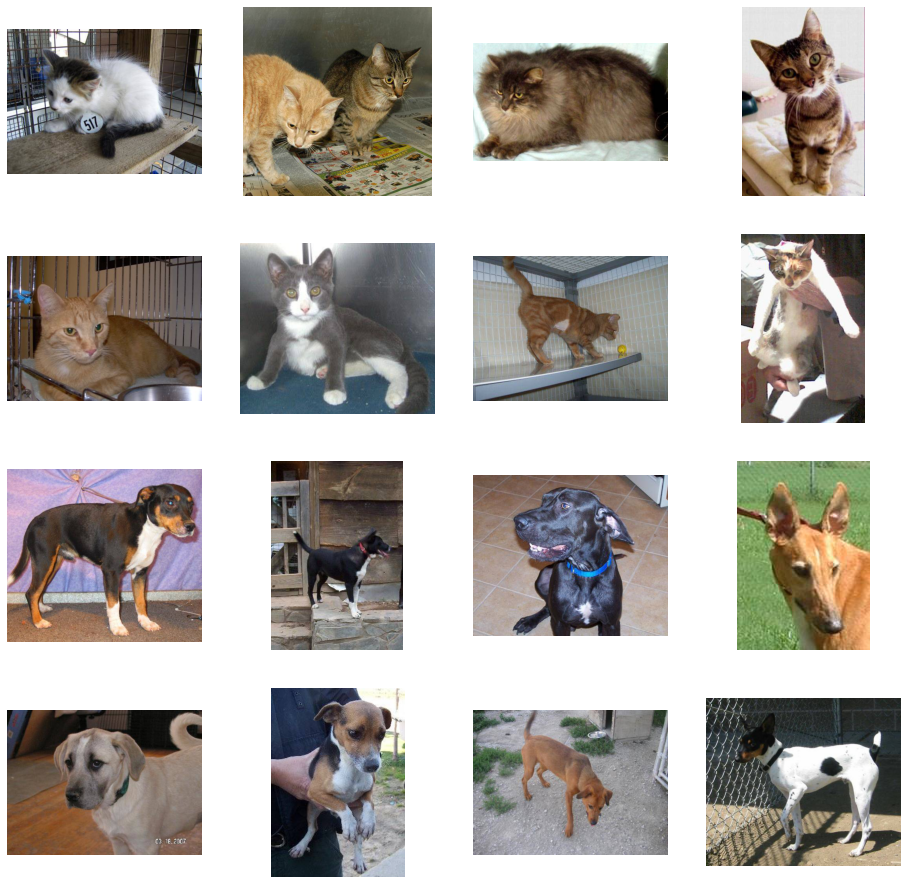

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index +=8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1 
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off") #Don'T show axes 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
import tensorflow as tf 

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(1, (3,3),input_shape = (150,150,3), activation ="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results to feed into DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    #Only 1 output neuron. It will contain a value from 0 to 1 where 0 for 1 class ("cats") and 1 for the other class ("dogs")
                                    tf.keras.layers.Dense(1, activation ="sigmoid")
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 1)       28        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [0]:
from tensorflow.keras.optimizers import RMSprop, Adam

model.compile(optimizer =RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics =["accuracy"])

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen =  ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 20 using train_data generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size =20,
                                                    class_mode ="binary",
                                                    target_size=(150,150))

# Flow validation images in batches fo 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode ="binary",
                                                         target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose=1)

Epoch 1/15
100/100 [==============================] - 10s 101ms/step - loss: 0.8220 - accuracy: 0.5560 - val_loss: 0.6767 - val_accuracy: 0.6250
Epoch 2/15
100/100 [==============================] - 10s 99ms/step - loss: 0.6609 - accuracy: 0.6345 - val_loss: 0.6448 - val_accuracy: 0.6710
Epoch 3/15
100/100 [==============================] - 10s 101ms/step - loss: 0.5737 - accuracy: 0.7025 - val_loss: 0.6260 - val_accuracy: 0.6640
Epoch 4/15
100/100 [==============================] - 10s 99ms/step - loss: 0.4809 - accuracy: 0.7890 - val_loss: 0.7310 - val_accuracy: 0.6600
Epoch 5/15
100/100 [==============================] - 10s 100ms/step - loss: 0.3494 - accuracy: 0.8430 - val_loss: 0.7637 - val_accuracy: 0.6830
Epoch 6/15
100/100 [==============================] - 10s 100ms/step - loss: 0.2314 - accuracy: 0.9110 - val_loss: 0.9651 - val_accuracy: 0.6710
Epoch 7/15
100/100 [==============================] - 10s 101ms/step - loss: 0.1464 - accuracy: 0.9480 - val_loss: 1.8365 - val_accu

In [26]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images 
  path="/content/" + fn
  img=image.load_img(path, target_size =(150,150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + "is a dog")

  else:
    print(fn + "is a cat")

Saving wallpaper.png to wallpaper.png
[1.]
wallpaper.pngis a dog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


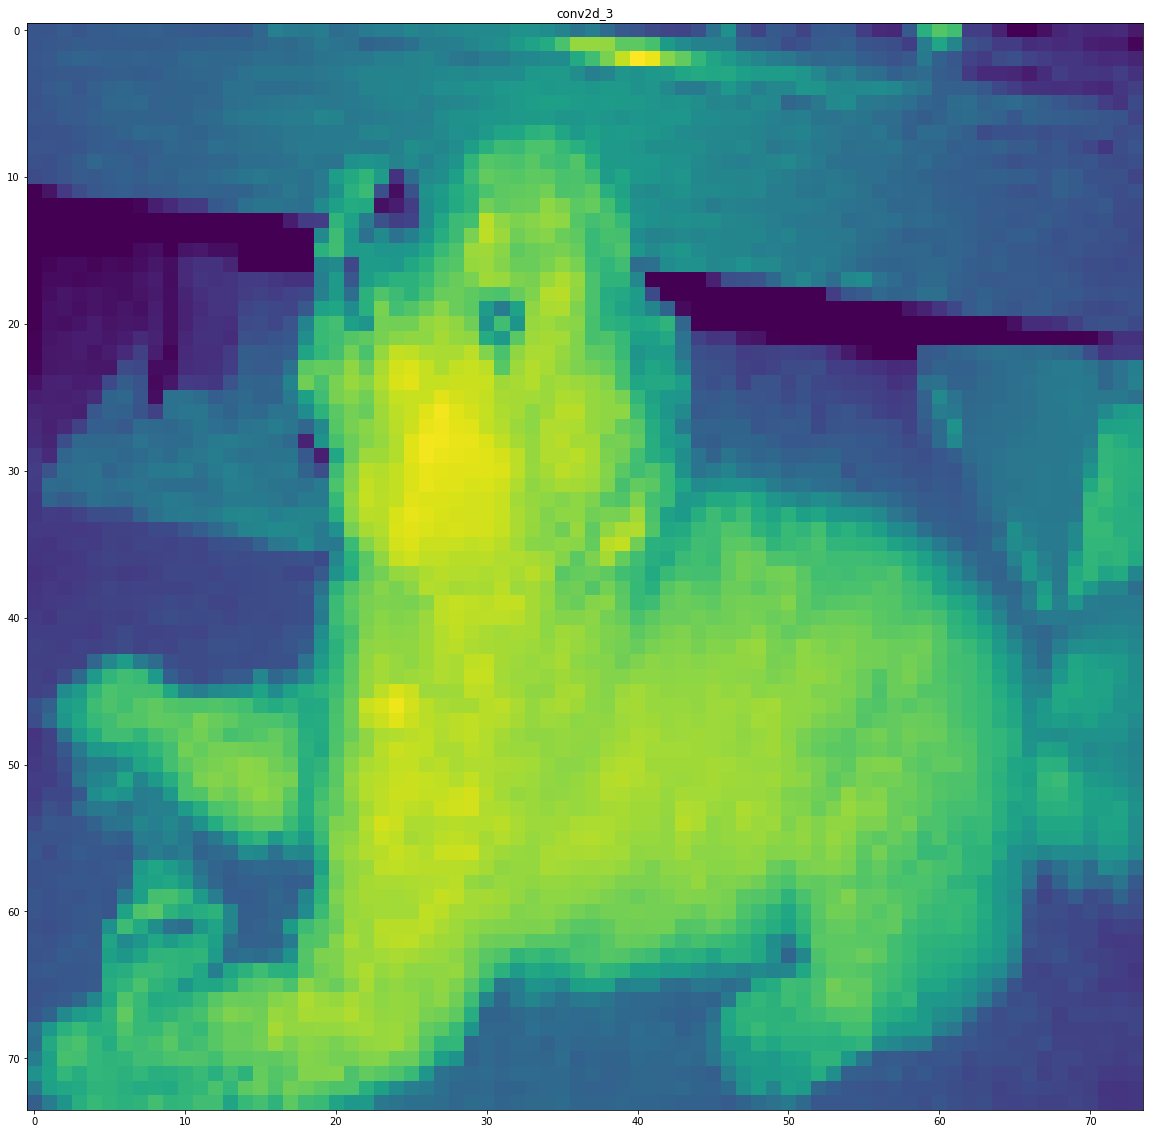

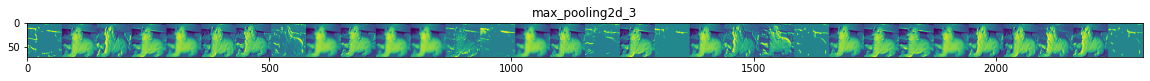

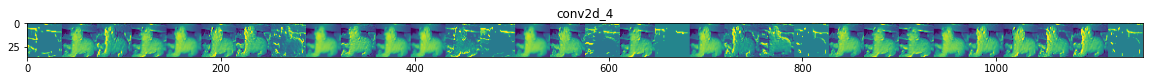

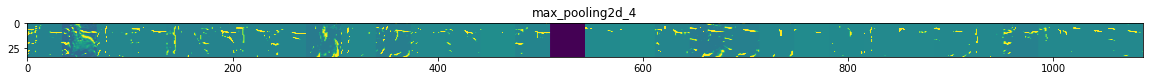

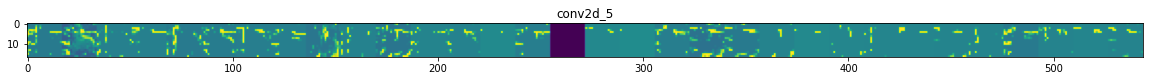

In [29]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

<Figure size 432x288 with 0 Axes>

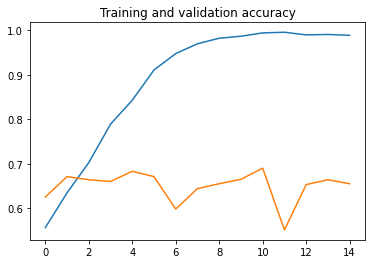

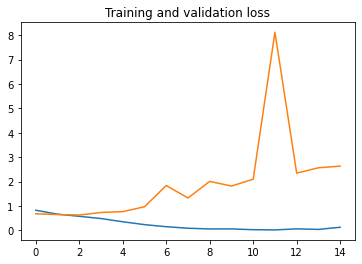

<Figure size 432x288 with 0 Axes>

In [36]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs,val_acc)
plt.title("Training and validation accuracy")
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training and validation loss")
plt.figure()

In [0]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )